### Continuous Classifier Naive Bayes

#### Lecture 4~
Places to learn about python libs: 
* chrisalbon.com


In [5]:
import pandas as pd
import numpy as np
from collections import *
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib

In [6]:
# !pip install sklearn

In [7]:
iris = sklearn.datasets.load_iris()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
iris['feature_names']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
cols = ['f1', 'f2', 'f3', 'f4']
X = iris['data']
y = iris['target']
data = pd.DataFrame(X, columns = cols)
data['y'] = y

In [19]:
data

,f1,f2,f3,f4,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
train, test = train_test_split(data, test_size = 0.5)

In [21]:
train.describe()

,f1,f2,f3,f4,y
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,5.805333,3.044000,3.706667,1.190667,0.960000
std,0.762622,0.467668,1.772106,0.782956,0.812736
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.150000,2.800000,1.550000,0.300000,0.000000
50%,5.700000,3.000000,4.200000,1.300000,1.000000
75%,6.300000,3.300000,5.100000,1.900000,2.000000
max,7.700000,4.400000,6.900000,2.500000,2.000000


In [22]:
test.describe()

,f1,f2,f3,f4,y
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,5.881333,3.070667,3.809333,1.208000,1.040000
std,0.892263,0.404292,1.768888,0.746118,0.829197
min,4.400000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.850000,1.600000,0.350000,0.000000
50%,5.900000,3.000000,4.400000,1.400000,1.000000
75%,6.500000,3.350000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.700000,2.500000,2.000000


array([[<AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>],
       [<AxesSubplot:title={'center':'f3'}>,
        <AxesSubplot:title={'center':'f4'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>]], dtype=object)

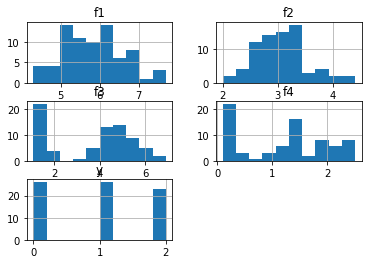

In [23]:
train.hist()

# $$ P(Features | Class) $$

- PROBABILITY OF THE FEATURES GIVEN THE CLASS

In [70]:
params_fc = {}

for y_val in set(train.y):
    sub = train[train.y == y_val]
    for f in cols:
        params_fc['{}-{}'.format(y_val, f)] = (sub[f].mean(), sub[f].std())

In [71]:
params_fc

{'0-f1': (5.065384615384615, 0.38981257823965376),
 '0-f2': (3.4384615384615387, 0.4587608728537542),
 '0-f3': (1.4692307692307693, 0.1783686761048156),
 '0-f4': (0.2538461538461539, 0.11395005653625356),
 '1-f1': (5.8961538461538465, 0.4820628749287954),
 '1-f2': (2.6923076923076925, 0.2755693407083987),
 '1-f3': (4.2846153846153845, 0.482238370677662),
 '1-f4': (1.3115384615384615, 0.19042462672022875),
 '2-f1': (6.539130434782609, 0.5475060235739899),
 '2-f2': (2.9956521739130433, 0.2787606677446137),
 '2-f3': (5.5826086956521745, 0.5219301363148865),
 '2-f4': (2.1130434782608694, 0.24918840595035524)}

# $$ P(Feature) $$

In [79]:
params_f = {}

for f in cols:
    params_f[f] = (train[f].mean(), train[f].std())

In [80]:
parms_f

{'f1': (5.8053333333333335, 0.7626223133326174),
 'f2': (3.044, 0.4676681660253491),
 'f3': (3.7066666666666674, 1.7721061933079407),
 'f4': (1.1906666666666668, 0.7829558223934603)}

In [81]:
def gaussian(x, mu, sig):
    return 1.0 / (np.sqrt(2.0* np.pi)*sig)*np.exp((-1.0)*np.power((x-mu)/sig, 2.0)/2.0)

# P(F|C)
def Pfc(feat='', F='', C=''):
    mu, sigma = params_fc['{}-{}'.format(C,feat)]
    return gaussian(F, mu, sigma)

#P(F)
def Pf(feat='', F=''):
    mu, sigma = params_f[feat]
    return gaussian(F, mu, sigma)

#P(C)
def Pc(C=''):
    return 1.0 / 3.0

#P(C|F) = P(F|C) * P(C) / P(F)
def Pcf(feat='', C='', F=''):
    return Pfc(feat, F, C) * Pc(C) / Pf(feat, F)

In [82]:
Pfc(feat = 'f1', F=2.2, C=1)


1.419175766536677e-13

## Test

In [94]:
for y_val in set(test.y):
    test[str(y_val)] = test.f1.map(lambda x: Pcf(feat='f1', C=y_val, F=x)) *\
    test.f2.map(lambda x: Pcf(feat='f2', C=y_val, F=x)) *\
    test.f3.map(lambda x: Pcf(feat='f3', C=y_val, F=x)) *\
    test.f4.map(lambda x: Pcf(feat='f4', C=y_val, F=x))
      
test['guess'] = test[['0','1','2']].idxmax(axis=1)
test['guess'] = test['guess'].astype(int)

<ipython-input-94-232f30cb9319>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[str(y_val)] = test.f1.map(lambda x: Pcf(feat='f1', C=y_val, F=x)) *\
<ipython-input-94-232f30cb9319>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['guess'] = test[['0','1','2']].idxmax(axis=1)
<ipython-input-94-232f30cb9319>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [95]:
test.head()

,f1,f2,f3,f4,y,0,1,2,guess
138,6.0,3.0,4.8,1.8,2,2.046530e-117,9.382130e-03,4.752804e-02,2
39,5.1,3.4,1.5,0.2,0,1.456298e+01,1.076620e-16,2.769896e-28,0
27,5.2,3.5,1.5,0.2,0,1.473561e+01,5.886597e-17,2.639215e-28,0
9,4.9,3.1,1.5,0.1,0,5.409520e+00,2.158170e-17,1.322094e-29,0
103,6.3,2.9,5.6,1.8,2,6.309367e-159,7.427860e-04,3.712296e-01,2


In [99]:
len(test[(test.y == test.guess)])/len(test)

0.9466666666666667

## Test with GaussianNB from sklearn

In [84]:
Xtrain = train[cols].values
ytrain = train.y
Xtest = test[cols].values
ytest = test.y

In [85]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [86]:
classifier.fit(Xtrain, ytrain)

GaussianNB()

In [87]:
preds = classifier.predict(Xtest)
sklearn.metrics.accuracy_score(ytest, preds)

0.9466666666666667